# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
   #  city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | north myrtle beach
Processing Record 3 of Set 1 | sorvag
City not found. Skipping...
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | hervey bay
Processing Record 8 of Set 1 | sharan
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | inowroclaw
Processing Record 13 of Set 1 | narasannapeta
Processing Record 14 of Set 1 | ketchikan
Processing Record 15 of Set 1 | wahran
City not found. Skipping...
Processing Record 16 of Set 1 | esso
Processing Record 17 of Set 1 | rabo de peixe
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set

City not found. Skipping...
Processing Record 38 of Set 4 | sretensk
Processing Record 39 of Set 4 | vilhena
Processing Record 40 of Set 4 | buraydah
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | shitanjing
Processing Record 43 of Set 4 | iskele
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | carballo
Processing Record 47 of Set 4 | prince rupert
Processing Record 48 of Set 4 | otane
Processing Record 49 of Set 4 | eresos
Processing Record 0 of Set 5 | kavaratti
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | salinas
Processing Record 3 of Set 5 | phan rang
City not found. Skipping...
Processing Record 4 of Set 5 | flinders
Processing Record 5 of Set 5 | bulgan
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | sangar
Processing Record 8 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 24 of Set 8 | birjand
Processing Record 25 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 8 | chastoozerye
City not found. Skipping...
Processing Record 27 of Set 8 | arraial do cabo
Processing Record 28 of Set 8 | kaduqli
Processing Record 29 of Set 8 | meiktila
Processing Record 30 of Set 8 | madras
Processing Record 31 of Set 8 | florence
Processing Record 32 of Set 8 | melk
Processing Record 33 of Set 8 | kruisfontein
Processing Record 34 of Set 8 | kirksville
Processing Record 35 of Set 8 | sampit
Processing Record 36 of Set 8 | nara
Processing Record 37 of Set 8 | rabaul
Processing Record 38 of Set 8 | yekaterinovka
Processing Record 39 of Set 8 | pacific grove
Processing Record 40 of Set 8 | truth or consequences
Processing Record 41 of Set 8 | bouar
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | sar

Processing Record 10 of Set 12 | sungai padi
Processing Record 11 of Set 12 | hudson bay
Processing Record 12 of Set 12 | atambua
Processing Record 13 of Set 12 | oranjemund
Processing Record 14 of Set 12 | mayo
Processing Record 15 of Set 12 | araouane
Processing Record 16 of Set 12 | vanavara
Processing Record 17 of Set 12 | san benito
Processing Record 18 of Set 12 | alpatovo
Processing Record 19 of Set 12 | kisumu
Processing Record 20 of Set 12 | dina
Processing Record 21 of Set 12 | mogzon
Processing Record 22 of Set 12 | krasnouralsk
Processing Record 23 of Set 12 | baherden
Processing Record 24 of Set 12 | ahipara
Processing Record 25 of Set 12 | madang
Processing Record 26 of Set 12 | calama
Processing Record 27 of Set 12 | salalah
Processing Record 28 of Set 12 | alotau
City not found. Skipping...
Processing Record 29 of Set 12 | dwarka
Processing Record 30 of Set 12 | biak
Processing Record 31 of Set 12 | ust-kuyga
Processing Record 32 of Set 12 | padang
Processing Record 33 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,53.26,50,0,3.44,AR,1675818307
1,north myrtle beach,33.8160,-78.6800,54.10,80,40,0.00,US,1675818232
2,cape town,-33.9258,18.4232,69.91,72,0,15.99,ZA,1675818192
3,san patricio,28.0170,-97.5169,74.16,79,100,16.11,US,1675818331
4,hervey bay,-25.2986,152.8535,80.20,60,88,19.84,AU,1675818332


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,53.26,50,0,3.44,AR,1675818307
1,north myrtle beach,33.8160,-78.6800,54.10,80,40,0.00,US,1675818232
2,cape town,-33.9258,18.4232,69.91,72,0,15.99,ZA,1675818192
3,san patricio,28.0170,-97.5169,74.16,79,100,16.11,US,1675818331
4,hervey bay,-25.2986,152.8535,80.20,60,88,19.84,AU,1675818332
...,...,...,...,...,...,...,...,...,...
561,maribo,54.7766,11.5002,30.94,93,100,8.28,DK,1675819020
562,sorong,-0.8833,131.2500,79.81,82,100,4.23,ID,1675819021
563,nushki,29.5542,66.0215,58.28,30,100,7.00,PK,1675819023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

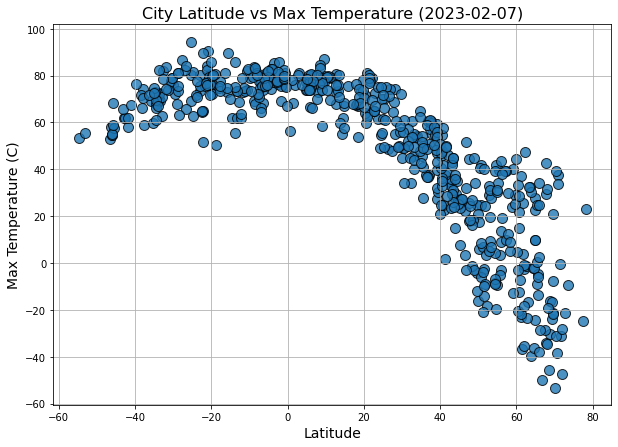

In [10]:
# Build scatter plot for latitude vs. temperature
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, max_temp, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

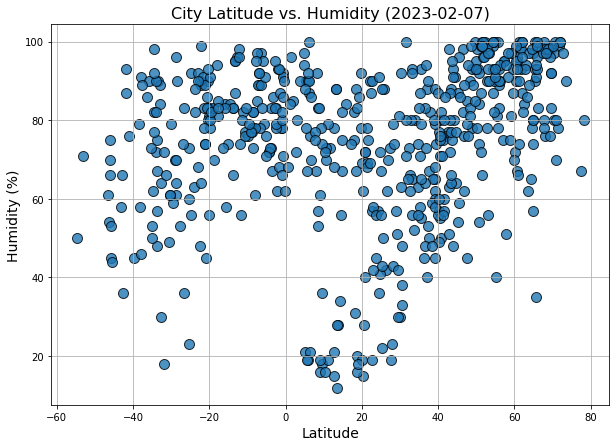

In [11]:
# Build the scatter plots for latitude vs. humidity
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
humid = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, humid, s = 100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

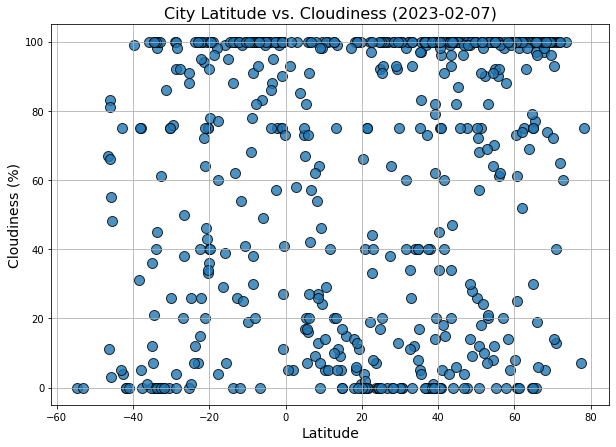

In [12]:
# Build the scatter plots for latitude vs. cloudiness
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, clouds, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

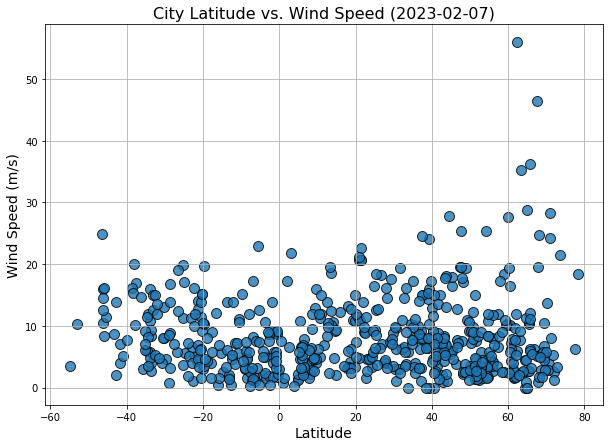

In [13]:
# Build the scatter plots for latitude vs. wind speed
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, wind, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.grid()
        
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # Retrieve regression values
    regress_values = x_axis * slope + intercept
    
    # Line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Build the scatter plots 

    fig1, ax1 = plt.subplots(figsize=(10,7))
    plt.scatter(x_axis, y_axis, s=100, marker="o", alpha=0.8)
    plt.plot(x_axis,regress_values,"r-")  
    
    # Incorporate the other graph properties
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ({curr_date})",fontsize = 16)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,north myrtle beach,33.8160,-78.6800,54.10,80,40,0.00,US,1675818232
3,san patricio,28.0170,-97.5169,74.16,79,100,16.11,US,1675818331
5,sharan,54.8167,54.0000,-9.62,100,92,1.70,RU,1675818334
8,inowroclaw,52.7989,18.2639,29.12,78,100,5.77,PL,1675818341
9,narasannapeta,18.4167,84.0500,66.92,88,5,4.16,IN,1675818342


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,53.26,50,0,3.44,AR,1675818307
2,cape town,-33.9258,18.4232,69.91,72,0,15.99,ZA,1675818192
4,hervey bay,-25.2986,152.8535,80.20,60,88,19.84,AU,1675818332
6,puerto ayora,-0.7393,-90.3518,79.56,92,27,8.99,EC,1675818058
7,hobart,-42.8794,147.3294,62.06,66,75,13.80,AU,1675817760


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7328139214674171


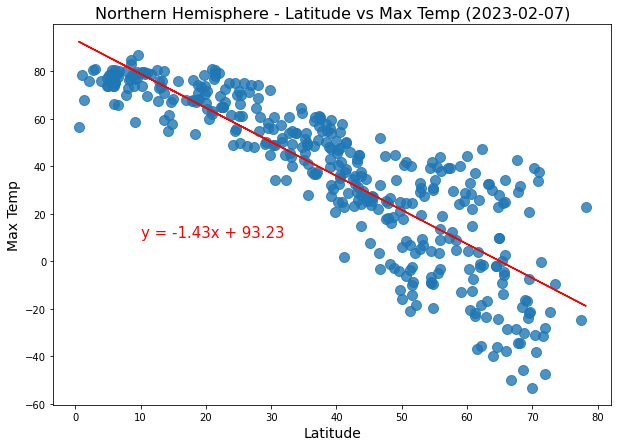

In [17]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Northern', (10, 10))
          
# Save Figure
plt.savefig("../output_data/fig1_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.23696943973569723


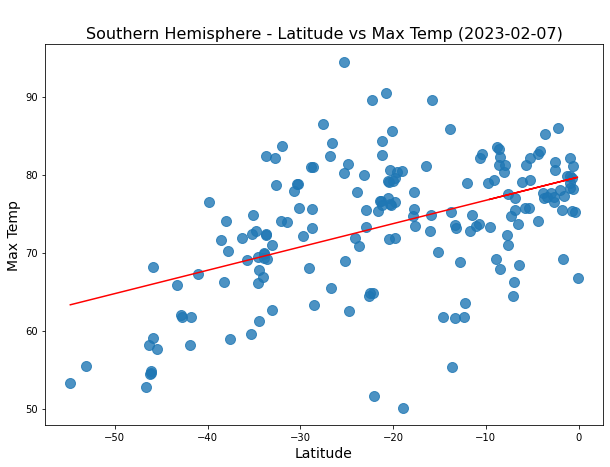

In [18]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Southern', (-20, 100))
          
# Save Figure
plt.savefig("../output_data/fig1_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** In the sampling from the Northern Hempisphere there is a positive moderate correlation between temperature and latitude. In the sampling from the Southern Hempisphere there is little to no positive correlation between the temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21750636008243573


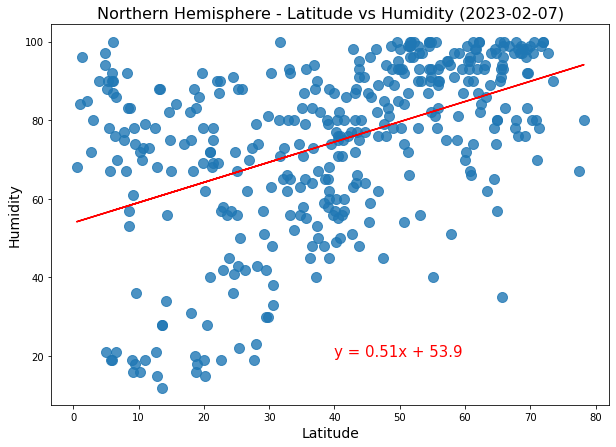

In [19]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Northern', (40, 20))
          
# Save Figure
plt.savefig("../output_data/fig2_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.1498995453782078


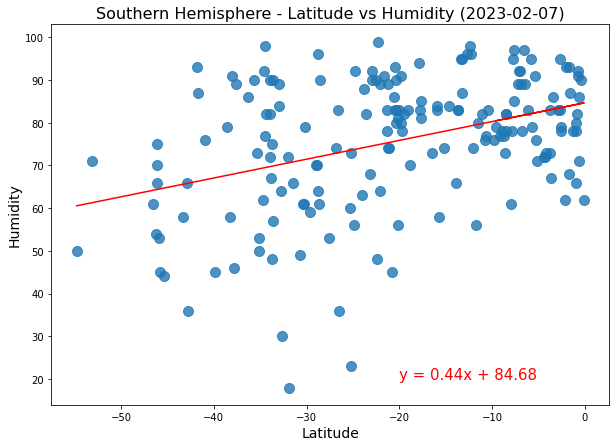

In [20]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Southern', (-20, 20))
          
# Save Figure
plt.savefig("../output_data/fig2_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** In the sampling from the Northern Hempisphere there is a weak positive correlation between humidity and latitude. In the sampling from the Southern Hempisphere there is no correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07328557345970843


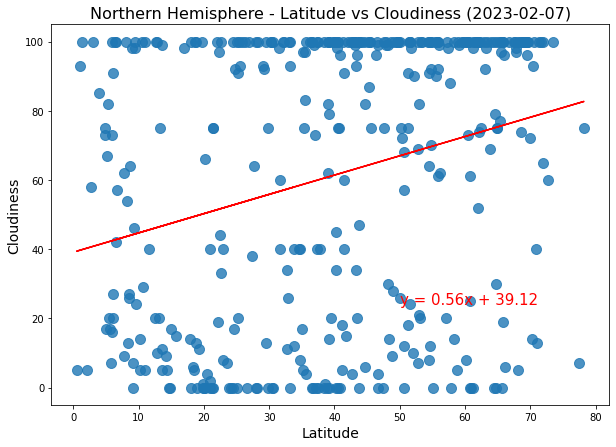

In [21]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Northern', (50, 24))
          
# Save Figure
plt.savefig("../output_data/fig3_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.19097454410767017


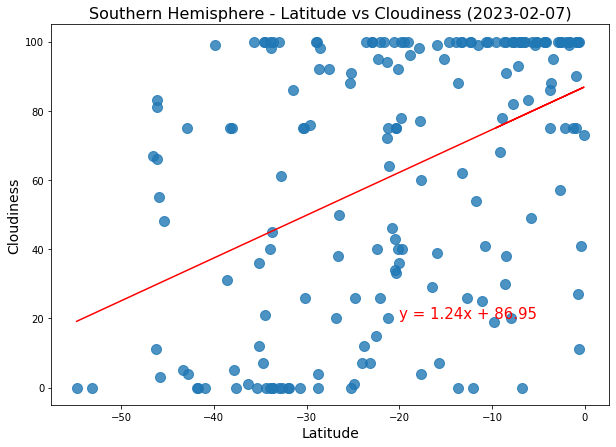

In [22]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Southern', (-20, 20))
          
# Save Figure
plt.savefig("../output_data/fig3_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness in the sample of both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002913727850285089


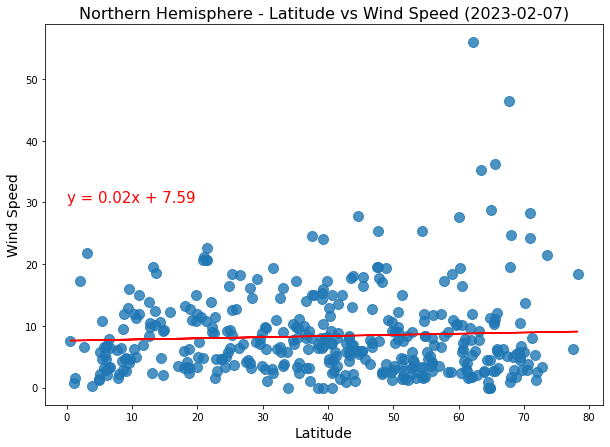

In [23]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Northern', (0, 30))
          
# Save Figure
plt.savefig("../output_data/fig4_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.1270687596505391


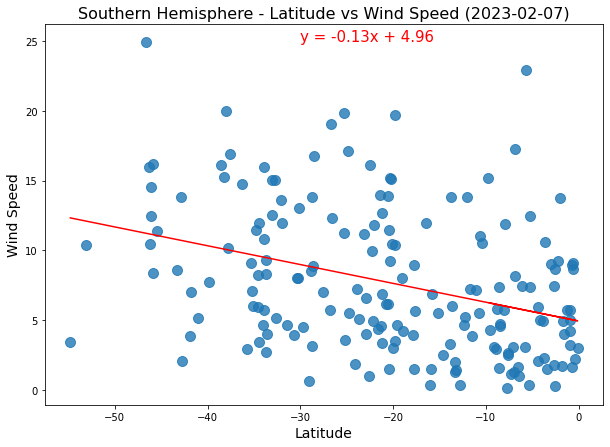

In [24]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Southern', (-30, 25))
          
# Save Figure
plt.savefig("../output_data/fig4_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** In the sampling from the Northern Hempisphere there is a very weak correlation between humidity and latitude. In the sampling from the Southern Hempisphere there is a very weak correlation between humidity and latitude.